In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import OneHotEncoder,LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


In [3]:
data = pd.DataFrame({
    'Size_sqft': [500, 700, 1000, 1200, 1500, 2500, 2600, 2700, 4000, 10000],  # last one is outlier
    'Rooms': [2, 3, 3, 4, 4, 5, 5, 6, 7, 10],
    'City': ['Chennai', 'Mumbai', 'Chennai', 'Delhi', 'Delhi', 'Mumbai', 'Mumbai', 'Chennai', 'Delhi', 'Chennai'],
    'Condition': ['Good', 'Average', 'Good', 'Excellent', 'Average', 'Good', 'Good', 'Poor', 'Excellent', 'Poor'],
    'Price_lakhs': [30, 45, 65, 80, 100, 150, 155, 160, 200, 500]  # target
})

In [4]:
data.head()

,Size_sqft,Rooms,City,Condition,Price_lakhs
0,500,2,Chennai,Good,30
1,700,3,Mumbai,Average,45
2,1000,3,Chennai,Good,65
3,1200,4,Delhi,Excellent,80
4,1500,4,Delhi,Average,100


In [36]:
data1=data[["Size_sqft" , "Rooms"]]
y=data[["Price_lakhs"]]

In [9]:
label1=OneHotEncoder(categories=[2])
label2=LabelEncoder()


In [15]:
data1=pd.get_dummies(data)
data1.columns
len(data1)


10

In [19]:
data["Rooms"][0]

np.int64(2)

In [21]:
for i in data1.columns:
    for j in range(len(data1)):
        if data1[i][j]==False:
            data1[i][j]=0
        elif data1[i][j]==True:
            data1[i][j]=1
        else:
            pass


C:\Users\annad\AppData\Local\Temp\ipykernel_21752\1640891796.py:6: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data1[i][j]=1
C:\Users\annad\AppData\Local\Temp\ipykernel_21752\1640891796.py:6: SettingWithCopyWarning: 
A value is trying to b

In [22]:
data1

,Size_sqft,Rooms,Price_lakhs,City_Chennai,City_Delhi,City_Mumbai,Condition_Average,Condition_Excellent,Condition_Good,Condition_Poor
0,500,2,30,1,0,0,0,0,1,0
1,700,3,45,0,0,1,1,0,0,0
2,1000,3,65,1,0,0,0,0,1,0
3,1200,4,80,0,1,0,0,1,0,0
4,1500,4,100,0,1,0,1,0,0,0
5,2500,5,150,0,0,1,0,0,1,0
6,2600,5,155,0,0,1,0,0,1,0
7,2700,6,160,1,0,0,0,0,0,1
8,4000,7,200,0,1,0,0,1,0,0
9,10000,10,500,1,0,0,0,0,0,1


In [26]:
X=data1.drop("Price_lakhs",axis="columns")
y=data1["Price_lakhs"]
X

,Size_sqft,Rooms,City_Chennai,City_Delhi,City_Mumbai,Condition_Average,Condition_Excellent,Condition_Good,Condition_Poor
0,500,2,1,0,0,0,0,1,0
1,700,3,0,0,1,1,0,0,0
2,1000,3,1,0,0,0,0,1,0
3,1200,4,0,1,0,0,1,0,0
4,1500,4,0,1,0,1,0,0,0
5,2500,5,0,0,1,0,0,1,0
6,2600,5,0,0,1,0,0,1,0
7,2700,6,1,0,0,0,0,0,1
8,4000,7,0,1,0,0,1,0,0
9,10000,10,1,0,0,0,0,0,1


In [48]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.05,random_state=42)

In [49]:
y_train

1     45
5    150
0     30
7    160
2     65
9    500
4    100
3     80
6    155
Name: Price_lakhs, dtype: int64

In [87]:
y_pred

array([ 36.69566872,  45.        ,  58.30433128,  76.68805784,
       100.        , 150.12315782, 154.87684218, 160.81003944,
       203.31194216, 499.18996056])

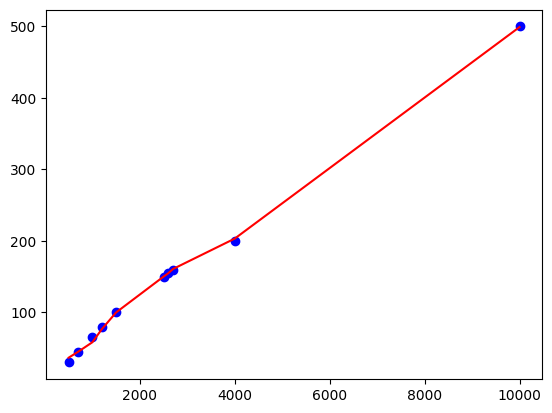

In [89]:
plt.scatter(X["Size_sqft"],y,color="blue")
plt.plot(X["Size_sqft"],y_pred,color="red")

In [79]:
model=LinearRegression()
model.fit(X,y)

LinearRegression()

In [67]:
model.predict([[500]])

c:\Users\annad\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([44.54111767])

In [80]:
model.coef_

array([  0.04753684,  -2.15975922, -22.93214788,  21.03121613,
         1.90093176, -16.71854459, -25.76943368,   7.15781326,
        35.33016502])

In [81]:
model.intercept_

np.float64(33.021100002306426)

In [82]:
y_pred=model.predict(X)

In [84]:
accuracy=mean_squared_error(y,y_pred)
accuracy

np.float64(11.294454438524886)

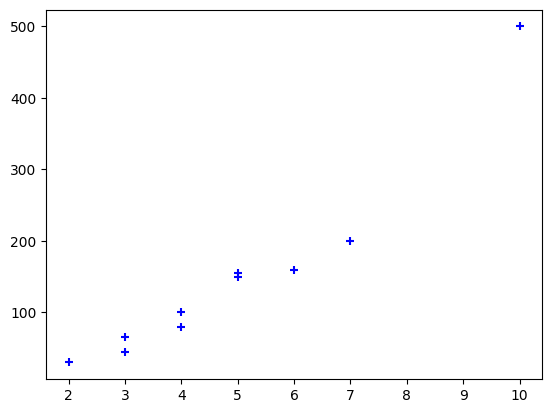

In [59]:
plt.scatter(X["Rooms"],y,color="blue",marker="+")

In [42]:
2*59.08256881+-133.0275229357798

-14.862385315779818

In [32]:
import numpy as np
x=np.array(data1)
y=np.array(y)


In [42]:
x,y

(array([[  500,     2],
        [  700,     3],
        [ 1000,     3],
        [ 1200,     4],
        [ 1500,     4],
        [ 2500,     5],
        [ 2600,     5],
        [ 2700,     6],
        [ 4000,     7],
        [10000,    10]]),
    Price_lakhs
 0           30
 1           45
 2           65
 3           80
 4          100
 5          150
 6          155
 7          160
 8          200
 9          500)

In [47]:
print(data1.size)
print(y.size)

20
10


In [53]:
y_pred=model.predict(X_test)
y_pred,y

(array([[228.08052201],
        [ 52.59578132]]),
    Price_lakhs
 0           30
 1           45
 2           65
 3           80
 4          100
 5          150
 6          155
 7          160
 8          200
 9          500)

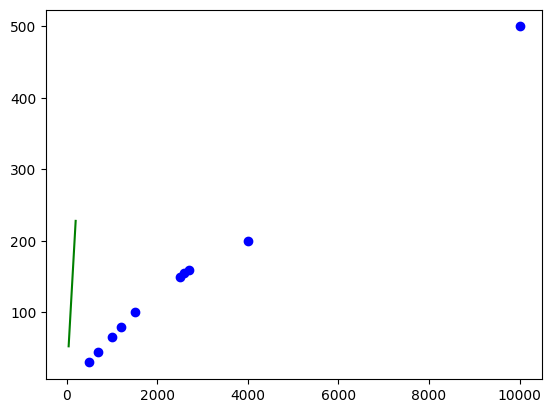

In [57]:
plt.scatter(data1['Size_sqft'],y,color='blue',label='Actual data')
plt.plot(y_test["Price_lakhs"],y_pred,color="green",label="Regression line")

In [4]:
data['Area_duplicate'] = data['Size_sqft'] * 1.01

In [6]:
X = data.drop('Price_lakhs', axis=1)
y = data['Price_lakhs']

In [8]:
X

,Size_sqft,Rooms,City,Condition,Area_duplicate
0,500,2,Chennai,Good,505.0
1,700,3,Mumbai,Average,707.0
2,1000,3,Chennai,Good,1010.0
3,1200,4,Delhi,Excellent,1212.0
4,1500,4,Delhi,Average,1515.0
5,2500,5,Mumbai,Good,2525.0
6,2600,5,Mumbai,Good,2626.0
7,2700,6,Chennai,Poor,2727.0
8,4000,7,Delhi,Excellent,4040.0
9,10000,10,Chennai,Poor,10100.0


In [9]:
categorical_cols = ['City', 'Condition']
numerical_cols = ['Size_sqft', 'Rooms', 'Area_duplicate']

In [10]:
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numerical_cols),
    ('cat', OneHotEncoder(drop='first'), categorical_cols)
])

In [11]:
model = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('regressor', LinearRegression())
])

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
model.fit(X_train, y_train)


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Size_sqft', 'Rooms',
                                                   'Area_duplicate']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['City', 'Condition'])])),
                ('regressor', LinearRegression())])

In [16]:
y_pred = model.predict(X_test)

print("\nMean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))



Mean Squared Error: 573.8213422487365
R² Score: 0.9044626277213342


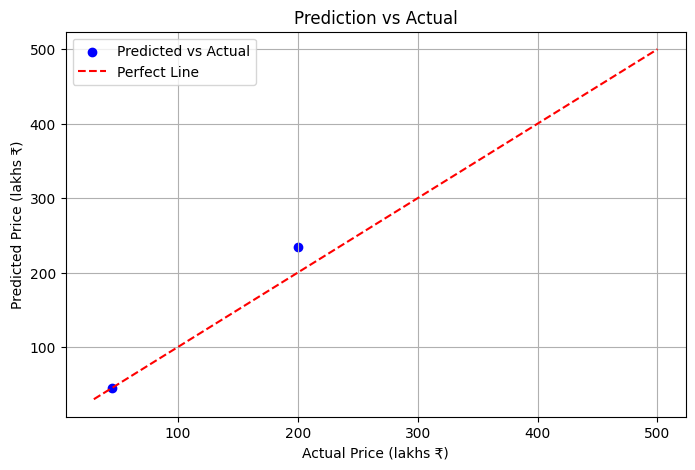

In [17]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', label='Perfect Line')
plt.xlabel('Actual Price (lakhs ₹)')
plt.ylabel('Predicted Price (lakhs ₹)')
plt.title('Prediction vs Actual')
plt.legend()
plt.grid(True)
plt.show()
